<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/TP7/TP7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 7: Reducción de Dimensionalidad

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar algoritmos de aprendizaje automático supervisado que permita encontrar la influencia de cada variable en el costo de una vivienda.
## Objetivos Específicos
*   Desarrollar un modelo de regresión lineal que prediga el precio de venta de un inmueble a partir de las variables del dataset.
*   Verificar los modelos de regresión lineal y no lineal a diferentes parámetros
*   Visualizar los resultados para distintos métodos de regresión no lineal

###¿Qué son los algoritmos de regresión?
El análisis de regresión es un subcampo del aprendizaje automático supervisado cuyo objetivo es establecer un método para la relación entre un cierto número de características y una variable objetivo continua.

###Problema
El presente trabajo práctico da solución al siguiente ejercicio:

El dataset de Sommelier de cerveza contiene 871901 reportes de cervezas 
scrappeados y 13 atributos del sitio BeerAdvocates. El objetivo es agrupar los tipos de
cervezas de acuerdo a dichos reportes, y elegir una de ellas como la 
mejor representante de cada grupo.
A continuación se describen los atributos:

*   brewery_name - nombre de la cervecería
*   beer_style - tipo de cerveza
*   nombre_cerveza - nombre de la cerveza
*   beer_abv - nivel de alcohol
*   review_appearance - Revisión de apariencia
*   review_aroma - revisión de fragancias
*   review_palate - revisión de sabor (paladar)
*   review_taste - revisión de sabor (gusto)
*   review_overall - descripción general




In [49]:
#Lectura de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

###1. Tratamiento de los datos

In [50]:
#Lectura de datos
df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBEE/data/beer_reviews_1.csv")
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.00,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.20,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.50,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.00,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.70,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871896,147,Stone Brewing Co.,1285613705,4.0,4.0,4.5,CHILLINDYLAN,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871897,147,Stone Brewing Co.,1285125252,4.5,4.0,4.5,drabmuh,American Barleywine,4.0,4.0,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871898,147,Stone Brewing Co.,1284682404,4.5,4.5,4.5,tavernjef,American Barleywine,4.0,4.5,Stone Old Guardian Barley Wine Style Ale 2010,11.10,56068
871899,147,Stone Brewing Co.,1030630588,4.0,4.0,3.5,uglyguy,American Barleywine,4.5,4.5,Stone Old Guardian Barley Wine Style Ale 2002,9.91,3678


In [51]:
#Visualización de los atributos
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [52]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

brewery_id                0
brewery_name              9
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      181
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              36242
beer_beerid               0
dtype: int64

In [53]:
#Permite obtener los estadísticos descriptivos
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,871901.000000,8.719010e+05,871901.000000,871901.000000,871901.000000,871901.000000,871901.000000,835659.000000,871901.000000
mean,3271.796264,1.227348e+09,3.828825,3.755972,3.856491,3.757737,3.808603,7.046130,23337.928449
std,5644.054301,7.531277e+07,0.704718,0.677216,0.597753,0.662392,0.711305,2.330143,22030.109041
min,1.000000,8.406720e+08,0.000000,1.000000,0.000000,1.000000,1.000000,0.010000,3.000000
25%,140.000000,1.179688e+09,3.500000,3.500000,3.500000,3.500000,3.500000,5.300000,2151.000000
50%,590.000000,1.243041e+09,4.000000,4.000000,4.000000,4.000000,4.000000,6.500000,17770.000000
75%,2743.000000,1.289962e+09,4.500000,4.000000,4.000000,4.000000,4.500000,8.500000,41722.000000
max,28003.000000,1.326285e+09,5.000000,5.000000,5.000000,5.000000,5.000000,57.700000,77314.000000


In [54]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871901 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          871901 non-null  int64  
 1   brewery_name        871892 non-null  object 
 2   review_time         871901 non-null  int64  
 3   review_overall      871901 non-null  float64
 4   review_aroma        871901 non-null  float64
 5   review_appearance   871901 non-null  float64
 6   review_profilename  871720 non-null  object 
 7   beer_style          871901 non-null  object 
 8   review_palate       871901 non-null  float64
 9   review_taste        871901 non-null  float64
 10  beer_name           871901 non-null  object 
 11  beer_abv            835659 non-null  float64
 12  beer_beerid         871901 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 86.5+ MB


###Eliminación de valores nulos
La función pandas. DataFrame. dropna() elimina los valores nulos del DataFrame dejando caer las filas o columnas que contienen los valores nulos.

In [55]:
# Drop null row values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835471 entries, 0 to 871900
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   brewery_id          835471 non-null  int64  
 1   brewery_name        835471 non-null  object 
 2   review_time         835471 non-null  int64  
 3   review_overall      835471 non-null  float64
 4   review_aroma        835471 non-null  float64
 5   review_appearance   835471 non-null  float64
 6   review_profilename  835471 non-null  object 
 7   beer_style          835471 non-null  object 
 8   review_palate       835471 non-null  float64
 9   review_taste        835471 non-null  float64
 10  beer_name           835471 non-null  object 
 11  beer_abv            835471 non-null  float64
 12  beer_beerid         835471 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 89.2+ MB


In [56]:
print(df.isnull().sum())

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64


En el conjunto de datos, la columna de tiempo de revisión tiene un tipo de datos de int64, por tanto, se convierte a un formato de fecha y hora

In [57]:
df.review_time = pd.to_datetime(df.review_time,unit = 's')

###Debemos preguntarnos, ¿es posible que un usuario califico la misma cerveza más de una vez?


In [58]:
# Ordenamos el atributo 'review_overall'
df = df.sort_values('review_overall', ascending=False)

# keep='first' mantiene la calificación más alta del usuario y elimina el resto
df = df.drop_duplicates(subset= ['review_profilename','beer_name'], keep='first')
df.info()

# Imprime el porcentaje de datos duplicados
print("Porcentaje de valores duplicados:", round((1518478 - 1496263)/ 1518478 * 100, 2),"%")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824468 entries, 136263 to 39648
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   brewery_id          824468 non-null  int64         
 1   brewery_name        824468 non-null  object        
 2   review_time         824468 non-null  datetime64[ns]
 3   review_overall      824468 non-null  float64       
 4   review_aroma        824468 non-null  float64       
 5   review_appearance   824468 non-null  float64       
 6   review_profilename  824468 non-null  object        
 7   beer_style          824468 non-null  object        
 8   review_palate       824468 non-null  float64       
 9   review_taste        824468 non-null  float64       
 10  beer_name           824468 non-null  object        
 11  beer_abv            824468 non-null  float64       
 12  beer_beerid         824468 non-null  int64         
dtypes: datetime64[ns](1), flo

Observamos un 1.46% de valores duplicados, dando a conocer que hubo usuarios que calificaron la misma cerveza varias ocasiones.

Es importante conocer si existe algún tipo de asociación entre atributos, corr() describe la correlación entre atributos de la dataframe

In [59]:
df.corr()

,brewery_id,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,-0.003749,0.034198,0.009777,0.007349,0.005494,0.077822,0.460838
review_overall,-0.003749,1.000000,0.595280,0.475798,0.686437,0.779704,0.111802,0.007011
review_aroma,0.034198,0.595280,1.000000,0.532570,0.590504,0.697554,0.312657,0.089894
review_appearance,0.009777,0.475798,0.532570,1.000000,0.539759,0.517960,0.237579,0.066183
review_palate,0.007349,0.686437,0.590504,0.539759,1.000000,0.715339,0.258309,0.057766
review_taste,0.005494,0.779704,0.697554,0.517960,0.715339,1.000000,0.265377,0.042048
beer_abv,0.077822,0.111802,0.312657,0.237579,0.258309,0.265377,1.000000,0.246182
beer_beerid,0.460838,0.007011,0.089894,0.066183,0.057766,0.042048,0.246182,1.000000


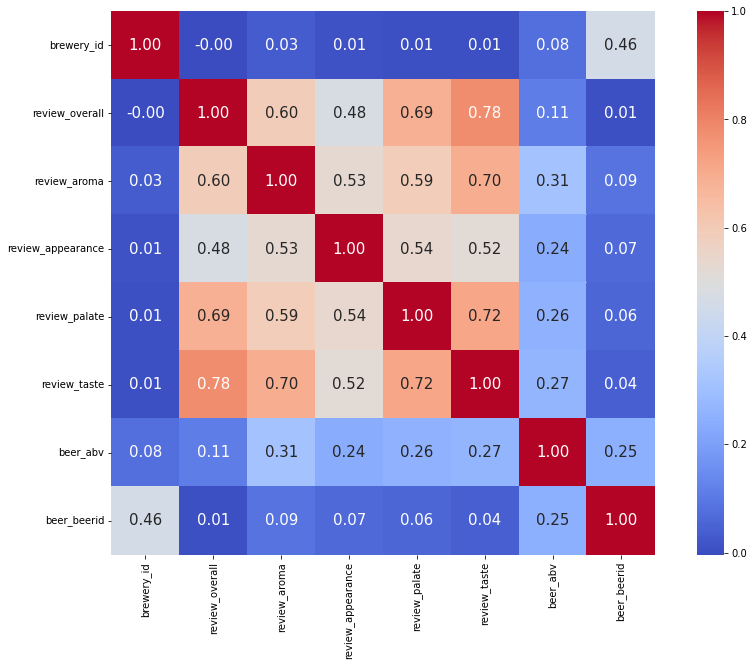

In [60]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Para una mejor interpretación se visualiza la correlación entre atributos, dando como resultado que no existen columnas con multicolinealidad

###Visualiazión de histogramas y densidad para cada variable

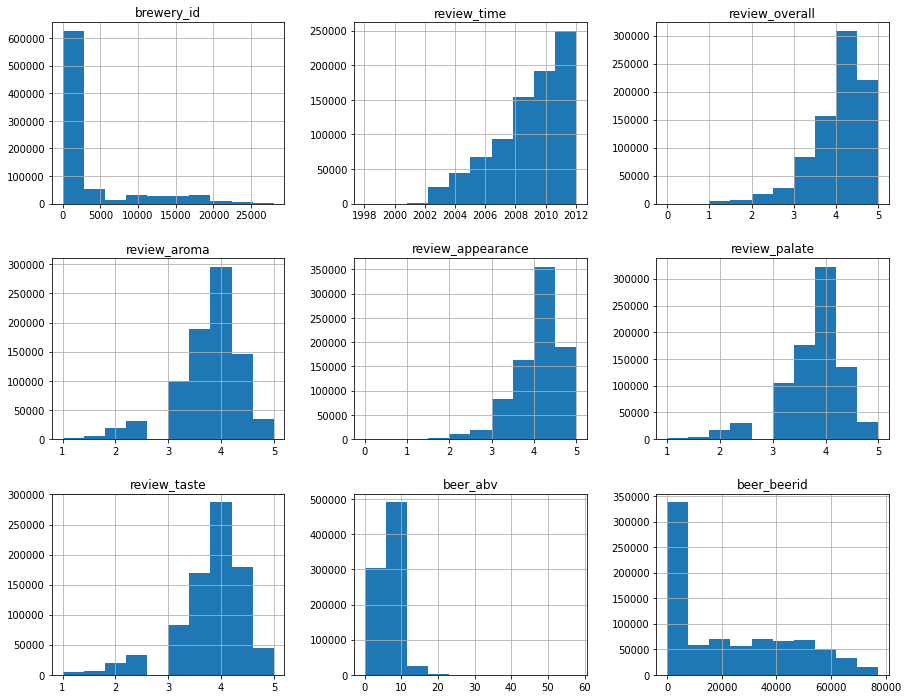

In [61]:
df.hist(figsize=(15,12))
plt.show()

###Reducción de la dimensionalidad

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

###Proceso de decodificación de datos

In [63]:
labelEncoder = LabelEncoder()
df["beer_name"] = labelEncoder.fit_transform(df["beer_name"])
df["beer_style"] = labelEncoder.fit_transform(df["beer_style"])
df["review_profilename"] = labelEncoder.fit_transform(df["review_profilename"])
df["brewery_name"] = labelEncoder.fit_transform(df["brewery_name"])

###Verificación de valores atípicos utilizando box plot

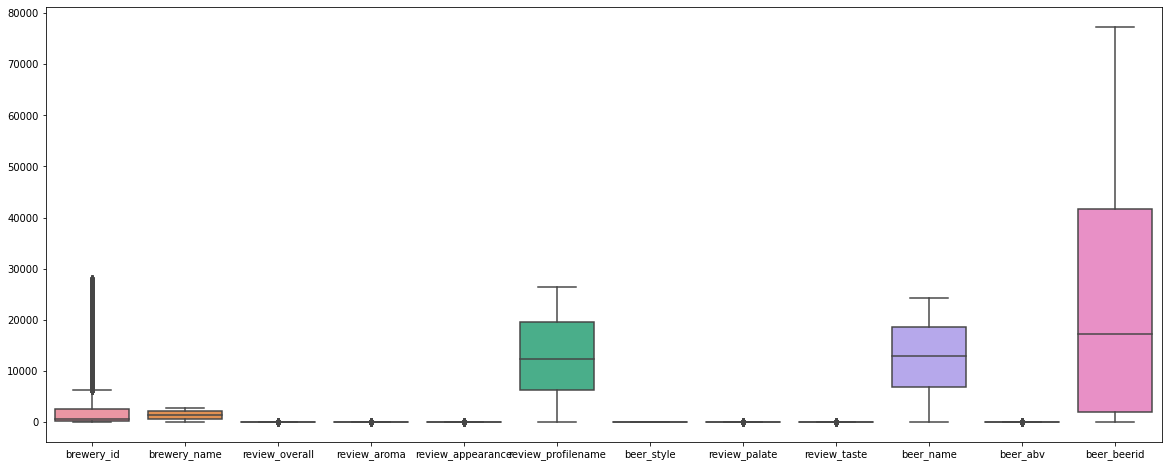

In [64]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

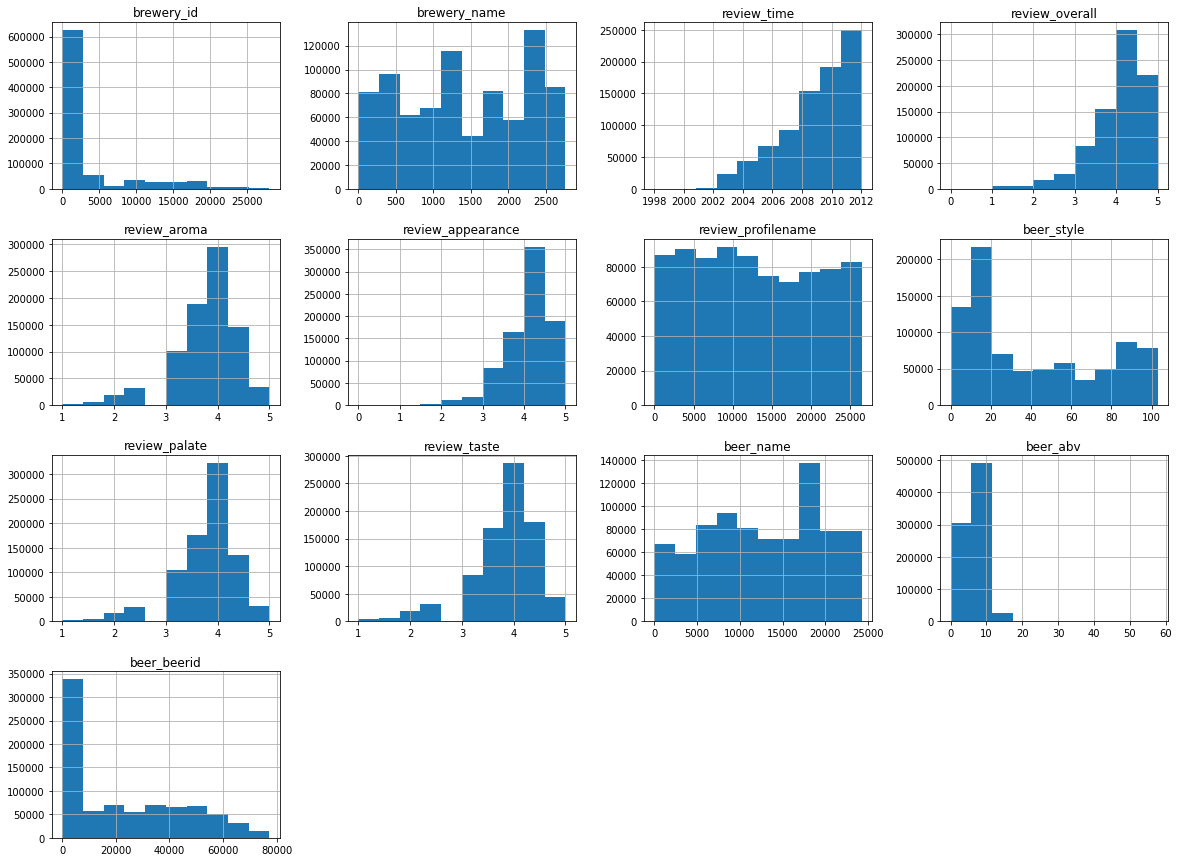

In [65]:
df.hist(figsize=(20,15))
plt.show()

###Eliminación de columnas innecesarias

In [66]:
df = df.drop(columns = 'brewery_id', axis = 1)
df = df.drop(columns = 'review_time', axis = 1)
df = df.drop(columns = 'review_profilename', axis = 1)
df = df.drop(columns = 'beer_beerid', axis = 1)
df

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
136263,2059,5.0,4.5,4.5,11,5.0,5.0,15589,10.0
49055,2394,5.0,4.0,4.5,81,4.5,4.5,20548,5.0
781379,2412,5.0,4.5,4.5,7,4.0,4.5,5302,5.1
712593,924,5.0,4.5,4.0,12,4.5,4.0,5949,6.0
431158,1518,5.0,4.5,4.0,37,5.0,5.0,1041,7.1
...,...,...,...,...,...,...,...,...,...
653726,2141,0.0,2.0,0.0,61,3.0,1.5,17567,4.0
37234,950,0.0,2.0,0.0,36,3.0,2.0,17002,4.0
653740,2141,0.0,2.0,0.0,40,2.5,2.0,17559,4.0
653695,2141,0.0,2.0,0.0,65,2.5,2.0,17557,4.0


###Escalamiento de datos
Es importante eliminar valores atípicos en los datos y trabajar a una misma escala.

In [67]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = 'review_overall', axis = 1)
y = df['review_overall']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
df.var(axis=0)

brewery_name         6.924426e+05
review_overall       4.915968e-01
review_aroma         4.545097e-01
review_appearance    3.545127e-01
beer_style           1.108906e+03
review_palate        4.337278e-01
review_taste         5.001589e-01
beer_name            4.625348e+07
beer_abv             5.441326e+00
dtype: float64

###PCA

In [69]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [70]:
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9']
)

,brewery_name,review_overall,review_aroma,review_appearance,beer_style,review_palate,review_taste,beer_name,beer_abv
PC1,-0.019434,-0.442995,-0.436798,-0.380092,0.019836,-0.449526,-0.474214,0.004590,-0.201861
PC2,-0.679360,-0.064740,0.014799,0.020117,0.045752,-0.010412,-0.020560,-0.701412,0.197614
PC3,0.321289,-0.148466,0.013841,0.001077,-0.785831,-0.053828,-0.063407,-0.219112,0.449533
PC4,0.007110,-0.283252,0.069019,0.060399,0.444288,-0.071081,-0.094949,0.277602,0.789167
PC5,0.658093,0.002327,0.016304,-0.047679,0.426340,0.002197,0.013893,-0.617937,-0.023655
PC6,-0.038374,0.277050,0.018806,-0.895449,0.004711,0.099925,0.266429,0.031938,0.193843
PC7,0.015028,0.160530,-0.815044,0.109403,0.018753,0.521316,-0.046167,-0.005445,0.153150
PC8,0.005021,0.520420,-0.311494,0.186048,0.018404,-0.710787,0.258524,-0.005346,0.158353
PC9,-0.002106,-0.569141,-0.205155,0.028110,-0.010612,-0.053755,0.788365,0.001810,-0.093120


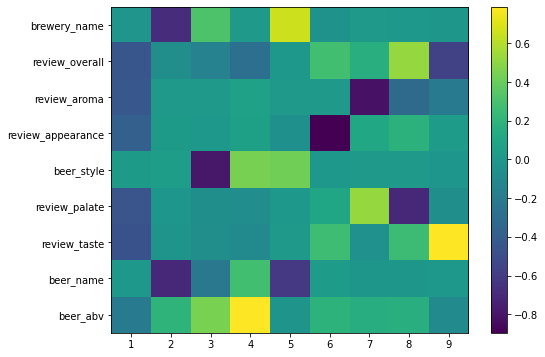

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.39763878 0.12986054 0.12202252 0.09735053 0.08848074 0.06403336
 0.04601839 0.03303693 0.02155822]


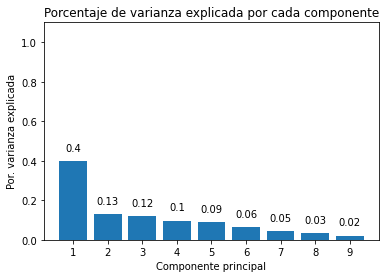

In [72]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.
Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.